In [35]:
import numpy as np
from numpy import ndarray
from typing import Callable, Dict, Tuple, List

np.set_printoptions(precision=4)

In [41]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data = housing.data
target = housing.target
features = housing.feature_names

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

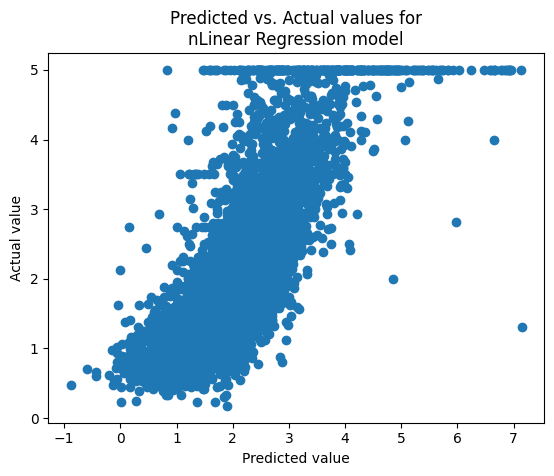

In [44]:
import matplotlib.pyplot as plt
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\nnLinear Regression model")
#plt.xlim([0, 51])
#plt.ylim([0, 51])
plt.scatter(preds, y_test)
#plt.plot([0, 51], [0, 51]);

In [36]:
def forward_linear_regression(X_batch: np.ndarray, 
                              y_batch: np.ndarray,
                              weights: Dict[str, np.ndarray]) -> Tuple[float, Dict[str, np.ndarray]]:
    # assert batch sizes of X and y are equal
    assert X_batch.shape[0] == y_batch.shape[0]

    # assert the matrix muplication can work
    assert X_batch.shape[1] == weighs['W'].shape[0]

    # assert that B is simply a 1x1 ndarray
    assert weights['B'].shape[0] == weights['B'].shape[1] == 1

    # compute the operations on the forward pass
    N = np.dot(X_batch, weights['W'])

    P = N + weights['B']

    loss = np.mean(np.power(y_batch - P, 2))

    # save the information computed on the forward pass
    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X_batch
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y_batch   

    return loss, forward_info                              
                                  

In [37]:
def loss_gradients(forward_info: Dict[str, np.ndarray],
                    weights: Dict[str, np.ndarray]) -> Dict[str, np.ndarray]:
    '''
    Compute dLdW and dLdB for the step-by-step linear regression model. '''
    batch_size = forward_info['X'].shape[0]
    dLdP = -2 * (forward_info['y'] - forward_info['P'])
    dPdN = np.ones_like(forward_info['N'])
    dPdB = np.ones_like(weights['B'])
    dLdN = dLdP * dPdN
    dNdW = np.transpose(forward_info['X'], (1, 0))

    dLdW = np.dot(dNdW, dLdN)
    # need to sum along dimension representing the batch size # (see note near the end of this chapter)
    dLdB = (dLdP * dPdB).sum(axis=0)
        
    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W'] = dLdW
    loss_gradients['B'] = dLdB
    return loss_gradients

In [6]:
a.shape[0]

2

In [7]:
print(a)

[[2 3 4]
 [5 6 7]]


In [17]:
type(a)

numpy.ndarray